In [2]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [3]:
## Custom imports
from matplotlib.cm import jet
from math import ceil, pi
from scipy.stats import poisson, norm, binom
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

In [3]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Prof. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

# Chapter 8

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. **Hypothesis testing**
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

## Topics

**[8 Hypothesis testing](#8-Hypothesis-testing)**

**[8.1 Decision making](#8.1-Decision-making)**
- 8.1.1 Introductory examples
- 8.1.2 Hypotheses
- 8.1.3 Alternative hypotheses
- 8.1.4 Types of errors
- 8.1.5 Significance and power

**[8.2 Practical examples](#8.2-Practical-examples)**
- 8.2.1 Hypothesis tests with a discrete distribution
- 8.2.2 Hypotheses and alternative hypotheses
- 8.2.3 Interpreting experiments: Null hypothesis

## 8 Hypothesis testing

### 8.1 Decision making

Hypothesis testing is essentially decision making.
Any test boils down to a yes-or-no answer.
This means it is fundamentally different to asking what the measured value of a given observable is as that can in principle take an infinite number of values.
Rather, hypothesis testing can evaluate whether the measured value of an observable represents a certain behaviour or not.

##### Example

Rather than asking what the value of the slope of a fit like the one shown below is, we can ask whether the slope indicates that the linear function is increasing. This is not yet a very precise question and we will pin down the various loose ends as we progress through this Chapter.

<img src="images/SimpleFit.png" width=40%>

#### 8.1.1 Introductory examples

In general we need the following to conduct a hypothesis test:
- The assertion that some hypothesis is true,
- A numerical test that is to be applied to data, and
- A hypothesis that is accepted or rejected depending on the outcome of the test.

There are several examples that feature in this course:
- Goodness of fit tests (Chapter 7)
- Two-sample problems (Chapter 7)
- The interpretation of experiments (Chapters 8-10)
- Analyses of several samples (Chapter 11)

Any hypothesis test will not be infallible.
We need to choose a level of confidence at which to take the decision.
Going back to our example of the linear fit, this level of confidence will be linked to the measured value and its uncertainty.
We will discuss how to quantify this in the following.

#### 8.1.2 Hypotheses

Hypotheses are statements that are either true or false. 
We distinguish simple and composite hypotheses.

**Simple hypotheses** define the probability distribution function completely.
Example hypotheses are:
- These data are drawn from a Poisson distribution of mean 3.4.
- The new treatment has identical effects to the old.

**Composite hypotheses** combine several probability distribution functions.
Example hypotheses are:
- These data are drawn from a Poisson distribution of mean greater than 4.
- The new treatment is an improvement on the old.

Referring back to the components of a hypothesis test, a simple hypothesis corresponds to a numerical test featuring a single equality that is being evaluated, while an inequality would be the numerical test of a composite hypothesis.

#### 8.1.3 Alternative hypotheses

In hypothesis tests we often compare to alternative hypothses.
These can take many different forms; examples of alternatives to the first hypothesis (Poisson with mean 3.4) are:
- These data are drawn from a Poisson distribution with another given mean, e.g. 4.5
- These data are drawn from a Poisson distribution with any random mean other than 3.4
- These data are not drawn from a Poisson distribution. This needs to be specified further in order to yield a numerical test.

In general, it is crucial to distinguish between one-tailed directional and two-tailed non-directional tests. 
A two-tailed test refers to the comparison of a test outcome to a value where we don't care of whether the outcome is less than or greater than the value.
In the directional test the sign of the difference between test outcome and comparison value is of importance.


#### 8.1.4 Type I/II errors

The outcome of a hypothesis test is the acceptance or rejection of the hypothesis based on the numerical test.
However, it may be that the decision taken does not reflect whether or not the hypothesis is actually true.
The two cases where there is a mismatch are called Type I and Type II error according to the following pattern:

| Hypothesis \ Decision | accept | reject |
|:-------------------|:----------:|:----------:|
| **true** | :) | Type I error |
| **false** | Type II error | :) |

#### 8.1.5 Significance and Power

**Significance**

Type I errors are inevitable and the rate at which they occur is called significance.
We know the probabbility ditribution function of the hypothesis, $P_H(x)$, for the case that the test involves the measurement of a quantity $x$.
In our previous example, $P_H(x)$ would be a Poisson distribution with mean 3.4.

The probability distribution function is then divided into a rejection and an acceptance region.

<img src="images/significance.png" width=60%>

The decision is then taken depending on where the measured value of $x$ falls.

The significance, $\alpha$, is the integral of the probability distribution of the hypothesis over the rejection region:

$$\alpha=\int_{Reject}P_H(x)dx.$$

Typically, we want $\alpha$ to be small, e.g. 1% or 5%.
In reality, we often need to work with the inequality

$$\alpha\geq\int_{Reject}P_H(x)dx,$$

as we may have a range of possible $P_H(x)$ (composite hypothesis) or a discrete distribution for which $\alpha$ cannot be reached exactly.
For composite hypotheses we would use the $P_H(x)$ that maximises $\alpha$.
All other incarnations of the composite hypothesis would therefore result in a smaller integral and be equally accepted.

**Power**

Considering the alternative hypothesis, we can define the integral of the probability distribution of the alternative hypothesis over the acceptance region as

$$\beta=\int_{Accept}P_A(x)dx,$$

or, by integrating of the rejection region as above, we get

$$1-\beta=\int_{Reject}P_A(x)dx,$$

where $1-\beta$ is called the power of the test.

<img src="images/power.png" width=60%>

**On the choice of the accept and reject regions**

The sketches above show the accept region to the left of the reject region. This is just one possible arrangement and the optimal way depends on the situation at hand. The general guiding principle is that we want 

- to minimise the significance, and
- to maximise the power.

Therefore, if the alternative hypothesis has a probability distribution to the right of the hypothesis under test the arrangement above makes sense. If the alternative hypothesis were to lie on the left, then accept and reject regions should be swappend. Finally, it is also possible to have a central accept region with reject regions to either side. We will see examples for that when discussing confidence intervals.

$~$

$~$

$~$

$~$

$~$

$~$

$~$

### 8.2 Practical examples

#### 8.2.1 Hypothesis tests with a discrete distribution

##### Example

Let us consider the following hypothesis:

A data point is drawn from a Poisson distribution with mean less or equal to 5.

We want to test this with 5% significance.

Hence, we need to evaluate

$$\alpha\geq\int_{Reject}P_H(x)dx,$$

which turns into

$$0.05\geq\int_{Reject}Poisson(x;\lambda=5)dx.$$

The Poisson distribution is dicrete, so we are looking for the limit, $n$, of the sum that satisfies

$$0.05\geq\sum_{x=n+1}^{\infty}Poisson(x;\lambda=5),$$

or, to avoid an infinite sum,

$$1-0.05=0.95\lt\int_{Accept}Poisson(x;\lambda=5)dx=\sum_{x=0}^{n}Poisson(x;\lambda=5).$$

Here, $n$ has been chosen as the limit of the acceptance region. 

For $n=9$ the cumulative sum is $0.968$, which is the first $n$ for which it exceeds $0.95$.

A greater value of $n$ would satisfy these inequalities as well, but we want to choose the $n$ that leaves us closest to the target value of $0.95$.

Any smaller mean than $5$ satisfies the equations above as well with $n=9$, which is why we chose to work with with $\lambda=5$.

Therefore, any observed value of $9$ or smaller would have the hypothesis accepted.

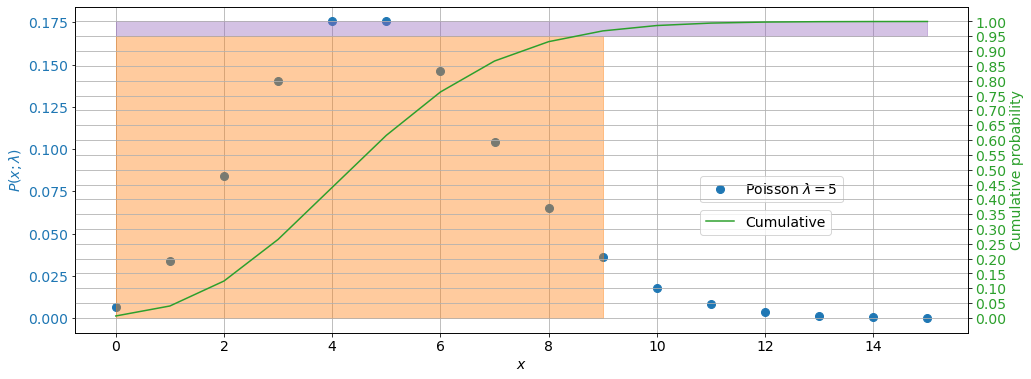

In [51]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

cl = 0.95

n = 15
minx = 0
x = range(0,n+1) # list of integers from 0 to n
rv = poisson(5)       # initialise poisson distribution
probs = rv.pmf(x)      # calculate poisson probabilities for all values of x and return list
ints = np.cumsum(probs, dtype=float) # calculate cumulative sum of probabilities

# work out limits of confidence interval based on cumulative sum of probabilities
x_high = n
for i in x:
    if ints[n-i]>cl: x_high = n-i

# prepare two plots with common x axis
fig,ax1 = plt.subplots(figsize=(16,6))
ax1.set_xticks(x[0::2])

# plot the probability distribution
ax1.plot(x[minx:],probs[minx:], 'bo', ms=8, label='Poisson $\lambda=5$',color='tab:blue')
ax1.grid(which='both',axis='x')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc=[0.7,0.4])
ax1.set_xlabel('$x$')
ax1.set_ylabel('$P(x;\lambda)$', color='tab:blue')


# draw a band indicating the excluded part of the confidence level
pp = PatchCollection([Rectangle((minx,cl),n-minx,1-cl)],alpha=0.4, color='tab:purple')

# draw a rectangle indicating the selected confidence interval
pp2 = PatchCollection([Rectangle((minx,0),x_high-minx,cl)],alpha=0.4, color='tab:orange')

step = 3
if 1 < step: ax2 = ax1.twinx()

# add these to the plot
if 2 < step:
    ax2.add_collection(pp)
    ax2.add_collection(pp2)

if 1 < step:
    # plot the cumulative integral
    ax2.plot(x[minx:],ints[minx:], '-', ms=8, label='Cumulative',color='tab:green')

    # plot optics
    ax2.set_yticks([x/20. for x in range(21)])
    ax2.grid(which='major',axis='y')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.legend(loc=[0.7,0.3])
    ax2.set_ylabel('Cumulative probability', color='tab:green')

plt.show()

$~$

$~$

$~$

$~$

$~$

$~$

$~$

#### 8.2.2 Hypotheses and alternative hypotheses

##### Example: Identifying Mars rocks

There has been no return mission to Mars, so all Martian rocks on earth came through being ejected from the surface of Mars by a meterorite impact and then having found their way to us. Their identity is compared to in-situ measurements by probes on the surface of Mars.

The following plot is from E.M. Stolper et al., Science 6153 (2013) 1239463.

<img src="images/F3.large.jpg" width=60%>

<img src="images/F3.large_zoom.jpg" width=80%>

We can now set the hypothesis that a sample is of Martian origin and set the alternative hypothesis that a sample is from earth. 

Let's focus here on the $TiO_2$ content, i.e. ignore the correlation of different concentrations. In order to do so, I have extracted the $TiO_2$ content distributions by eye and obtained the following data.

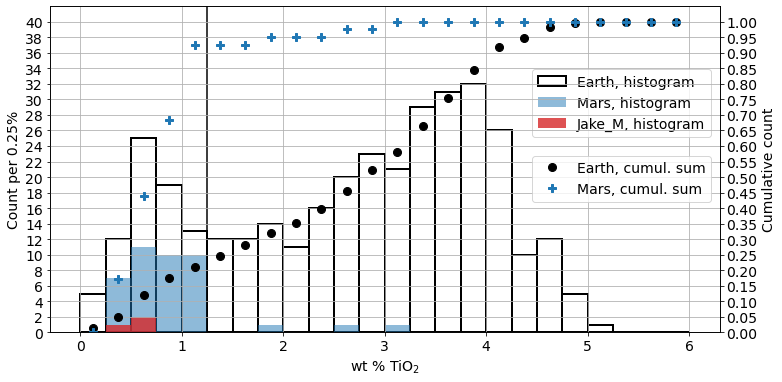

In [5]:
xx = np.linspace(0.125,5.875,24)
earth_data = [5,12,25,19, 13,12,12,14, 11,16,20,23, 21,29,31,32, 26,10,12,5, 1,0,0,0]
mars_data = [0,7,11,10, 10,0,0,1, 0,0,1,0, 1,0,0,0, 0,0,0,0, 0,0,0,0]
test_data = [0,1,2,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0]

earth_sum = np.cumsum(earth_data)               # calculate cumulative sum of data points above
earth_total = earth_sum[-1]                     # determine total
earth_sum = [i/earth_total for i in earth_sum] # normalise cumulative sum

mars_sum = np.cumsum(mars_data)
mars_total = mars_sum[-1]
mars_sum = [i/mars_total for i in mars_sum]
test_sum = np.cumsum(test_data)
test_total = test_sum[-1]
test_sum = [i/test_total for i in test_sum]

fig,ax1 = plt.subplots(figsize=(12,6))

# plot histograms
ax1.bar(xx,earth_data,width=0.25,fill=False,label='Earth, histogram',linewidth=2,edgecolor='k')
ax1.bar(xx,mars_data,width=0.25,alpha=0.5,label='Mars, histogram',color='tab:blue')
ax1.bar(xx,test_data,width=0.25,alpha=0.8,label='Jake_M, histogram',color='tab:red')
# optics, part 1
ax1.set_yticks([x*2. for x in range(21)])
plt.ylim(0,42)
ax1.grid(which='both',axis='x')
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend(loc=[0.72,0.6])
ax1.set_xlabel('wt % TiO$_2$')
ax1.set_ylabel('Count per 0.25%', color='k')

# plot cumulative distributions
ax2 = ax1.twinx()
ax2.plot(xx,earth_sum, 'bo', ms=8, label='Earth, cumul. sum',color='k')
ax2.plot(xx,mars_sum, 'bP', ms=8, label='Mars, cumul. sum',color='tab:blue')

# optics, part 2
ax2.set_yticks([x/20. for x in range(21)])
ax2.grid(which='major',axis='y')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc=[0.72,0.4])
plt.ylim(0,1.05)
ax2.set_ylabel('Cumulative count', color='k')


ax1.plot([1.25,1.25],[0,42],color='k')

plt.show()

Defining the acceptance region for the alternative hypothesis (earth-like) as $>1.25\%$, we would wrongly reject about $7\%$ of Martian rocks, i.e. $\alpha=7\%$, and we would wrongly accept about $21\%$ of earth rock samples, hence $\beta=21\%$, which means the power is $79\%$.

The sample analysed in this paper are the Jake\_M rocks, for which we would reject the alternative hypothesis of being of earth origin in this test. A power of $79\%$ may not be very satisfactory in this context and the correlation shown in the plots illustrate that a combined analysis of all available input would be much preferrable. We will get back to this topic in Chapter 11.

$~$

$~$

$~$

$~$

$~$

$~$

$~$

#### 8.2.3 Interpreting experiments: null hypothesis

Measurements can have different goals; some are designed to measure a certain quantity, e.g. the rate at which a process occurs, while others aim to make a discovery or test a particular theory prediction. The former is rather straightforward in terms of statistics as it just requires knowledge of the resolution of the experiment (and any possible systematic uncertainties). Statistical treatment is at best required for repeated executions of the measurements, which is sufficiently trivial.

When testing the validity of a theory or aiming to make a discovery, we find ourselves in a situation where we are testing a hypothesis. However, we can only ever reject a hypothesis with great confidence, but not accept it. This is because any given measurement will yield a result for an observable that is a random variable distributed according to the probability distribution of the hypothesis. Any measured value that falls in the bulk of the probability distribution does not indicate a strong increase or decrease in the support for the hypothesis, whereas a value measured to be in the extreme tails of the distribution allows to reject the hypothesis at great confidence.

In short: for any theory we want to test, we have to formulate the opposite hypothesis and aim to falsify this. This hypothesis is called the null hypothesis, $H_0$. In a way this is similar to the alternative hypothesis discussed before, just that here we do not need to specify the original hypothesis.

##### Example: Poisson statistics

In many counting experiments we will have a situation where we want to identify whether a significant excess exists above a certain level of expected counts. 

Let's join a group of bird watchers who make a head count of a bird population once per year and who want to know whether the population grew compared to their long-term average with a significance of $1\%$. The average until 2017 is $132$, followed by a count of $160$ in 2018. 

We want to test the null hypothesis that the 2018 count is in agreement with the same distribution as expected from the average, i.e. a Poisson distribution with mean $132$. 

We now have two options. The first is to use the recipe above, i.e. to calculate the cumulative distribution for a Poisson distribution with mean $132$ and to evaluate the point at which this exceeds $99\%$. This would give a result of $159$, which is the last value for which the hypothesis would still be accepted, i.e. it would be rejected for the observed count of $160$.

The second option is to realise that for a mean of $132$ we can approximate the Poisson distribution with a normal distribution with mean $132$ and standard deviation $\sqrt{132}=11.5$. The observed increase therefore corresponds to $(160-132)/11.5~\sigma = 2.4\sigma$. Based on a table of probabilities for a normal distribution, we can find that this corresponds to a significance of $0.7\%$ for a one-tailed distribution. This means that also based on this approach we would reject the null hypothesis and therefore say that the observed count represents growth compared to the long-term average size of the population at the $1\%$ significance level.

$~$

$~$

$~$

$~$

$~$

$~$

$~$

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>